# Nearness to other negative events

In [3]:
%load_ext autoreload
%autoreload 2
import pandas as pd
import numpy as np
import scipy.stats as sp

df_train = pd.read_csv('data\\train.csv')
# df_train.to_parquet('train.parquet')
# df_train = pd.read_parquet('train.parquet')
df_ts = df_train.iloc[:,5:] # timeseries features only
df_train['y_s'] = df_train.y > 1 # simplified y: label 0 for 1 and 1 for 2,3 
df_train


The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


,id,main.pos,fun.pos,when,y,E1A1,E1A2,E1A3,E1A4,E1A5,...,M2V2040,M2V2041,M2V2042,M2V2043,M2V2044,M2V2045,M2V2046,M2V2047,M2V2048,y_s
0,1,LHCB-P18,QSCB-18-C2,2017-06,1,-0.576589,-0.951065,0.944338,-0.086406,0.253089,...,-0.101842,0.027109,0.168339,0.152390,0.000410,-0.126250,0.072403,0.214993,0.184996,False
1,2,LHCB-6,QSCB-6-CP6,2018-09,1,0.970694,1.524991,1.813341,0.447012,-1.038631,...,-0.057328,-0.146602,0.069251,0.351492,0.106101,0.192691,0.167834,-0.170475,-0.236751,False
2,3,LHCB-8,QSCB-8-CP7,2022-11,1,1.065262,0.461292,0.416869,0.460564,-0.019386,...,-0.044788,0.011786,-0.037881,-0.152690,-0.104267,0.037444,0.489454,0.268134,-0.117367,False
3,4,LHCB-8,QSCB-8-CP1,2023-04,1,-0.341942,0.614190,0.904430,0.727268,0.187494,...,-0.071131,0.067982,-0.023509,-0.028273,0.000943,-0.018128,0.013366,0.015902,0.043247,False
4,5,LHCB-P18,QSCB-18-C1,2017-04,1,-0.569563,0.368497,-0.269832,-0.179988,-0.065328,...,0.105978,0.020868,0.173724,-0.037431,0.147695,0.038233,-0.047549,0.101227,-0.109760,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
658,1012,LHCB-4,QSCB-4-CP1,2019-03,1,-0.094653,-0.273495,0.927676,-0.244089,0.394102,...,-0.017458,0.113222,0.081531,-0.118022,-0.068159,-0.160683,-0.054098,-0.043842,0.079474,False
659,1013,LHCB-6,QSCB-6-CP1,2022-05,1,-0.447106,-0.074231,0.331543,0.150676,-0.050445,...,0.240015,0.169615,0.068595,0.097196,-0.020113,-0.010522,0.063634,0.096408,-0.085637,False
660,1014,LHCB-P18,QSCB-18-C2,2018-04,1,0.264532,1.554129,-1.447155,0.442756,2.655931,...,0.087096,-0.399536,-0.121802,-0.027615,-0.190010,-0.099357,-0.026138,-0.008852,-0.108788,False
661,1015,LHCB-4,QSCB-4-CP7,2017-01,1,-0.522473,-0.007026,0.361770,-0.630256,-0.851504,...,-0.215720,-0.006428,0.037543,0.120194,0.155707,0.156359,0.280801,0.155129,0.176686,False


In [4]:
df_train['when_dt'] = pd.to_datetime(df_train.when)
mfw = df_train[df.y > 1].groupby(['main.pos', 'fun.pos', 'when_dt']).y.count().reset_index()

Text(0.5, 1.0, 'Negative Events vs total measurements')

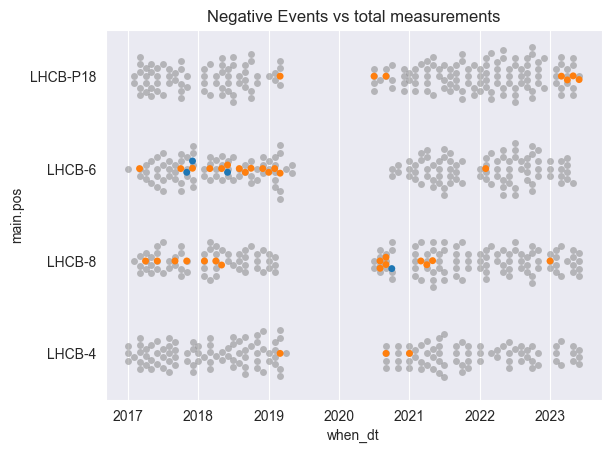

In [5]:
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style('darkgrid')
sns.swarmplot(data=df_train, x='when_dt', y = 'main.pos', color='grey', alpha =0.5, legend=False)
df_train['y_c'] = df_train.y.astype(str)
sns.swarmplot(data=df_train[df_train.y > 1], x='when_dt', y = 'main.pos', hue='y_c', legend=False)
plt.title('Negative Events vs total measurements')

In [6]:
df_sub = pd.read_csv('data\\test.csv')
df_sub['when_dt'] = pd.to_datetime(df_sub.when)


Text(0.5, 1.0, 'Negative Events vs prediction measurements')

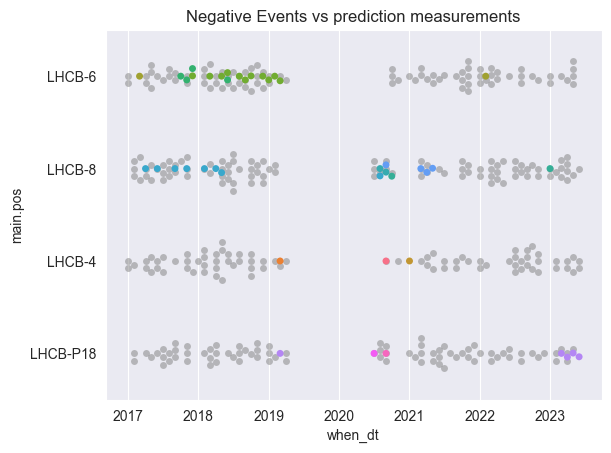

In [7]:
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style('darkgrid')
sns.swarmplot(data=df_sub, x='when_dt', y = 'main.pos', color='grey', alpha =0.5, legend=False)
sns.swarmplot(data=mfw, x='when_dt', y = 'main.pos', hue='fun.pos', legend=False)
plt.title('Negative Events vs prediction measurements')

Text(0.5, 1.0, 'Known measurements vs prediction')

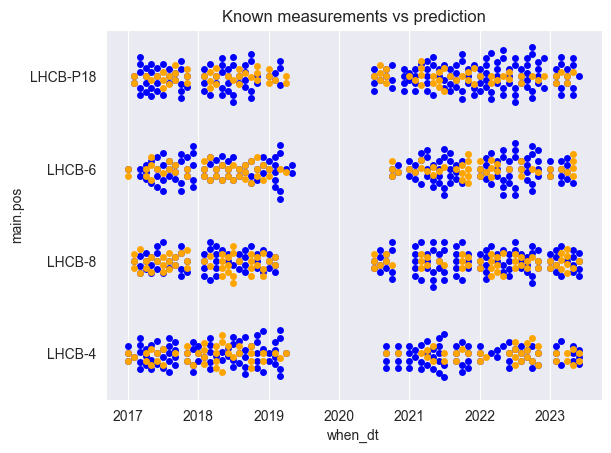

In [8]:
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style('darkgrid')
sns.swarmplot(data=df_train, x='when_dt', y = 'main.pos', color='blue', legend=False)
sns.swarmplot(data=df_sub, x='when_dt', y = 'main.pos', color='orange', legend=False)
plt.title('Known measurements vs prediction')

Identify gap

In [9]:
dta = sorted(df_train.when_dt.unique())
diffs = [dta[i] - dta[i-1] for i in range(1, len(dta))]


big_leap_idx = max(enumerate(diffs), key=lambda x: x[1])[0]

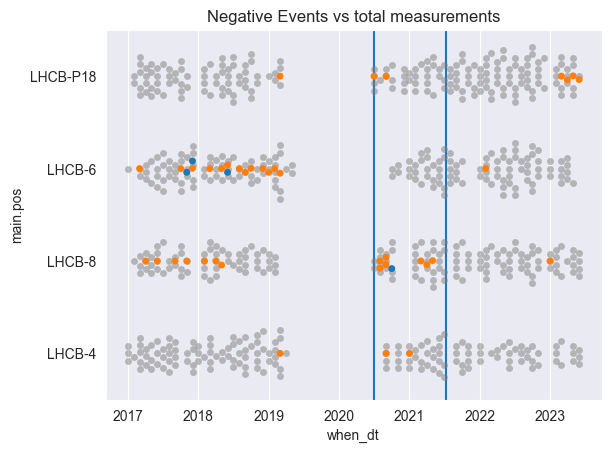

In [10]:
import datetime

big_leap = dta[big_leap_idx+1]
big_leap_proximity_end = big_leap+datetime.timedelta(days=31*12)

import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style('darkgrid')
sns.swarmplot(data=df_train, x='when_dt', y = 'main.pos', color='grey', alpha =0.5, legend=False)
df_train['y_c'] = df_train.y.astype(str)
sns.swarmplot(data=df_train[df_train.y > 1], x='when_dt', y = 'main.pos', hue='y_c', legend=False)
plt.title('Negative Events vs total measurements')
plt.axvline(x=big_leap)
plt.axvline(x=big_leap+datetime.timedelta(days=31*12))

In [11]:

df_train['after_big_leap'] = df_train.when_dt.between(big_leap, big_leap_proximity_end)


## Proximity to other negative events

In [22]:
window = 5

df_train.y_c = df_train.y -1
broken_when = df_train.groupby(['when_dt']).y_c.sum()

proximity_when_broken = broken_when.sort_index().rolling(window=7, center=True, min_periods=1).sum()


In [40]:
df_train['time_proximity'] = df_train.when_dt.map(proximity_when_broken)
df_train


,id,main.pos,fun.pos,when,y,E1A1,E1A2,E1A3,E1A4,E1A5,...,M2V2044,M2V2045,M2V2046,M2V2047,M2V2048,y_s,when_dt,y_c,after_big_leap,time_proximity
0,1,LHCB-P18,QSCB-18-C2,2017-06,1,-0.576589,-0.951065,0.944338,-0.086406,0.253089,...,0.000410,-0.126250,0.072403,0.214993,0.184996,False,2017-06-01,0,False,4.0
1,2,LHCB-6,QSCB-6-CP6,2018-09,1,0.970694,1.524991,1.813341,0.447012,-1.038631,...,0.106101,0.192691,0.167834,-0.170475,-0.236751,False,2018-09-01,0,False,7.0
2,3,LHCB-8,QSCB-8-CP7,2022-11,1,1.065262,0.461292,0.416869,0.460564,-0.019386,...,-0.104267,0.037444,0.489454,0.268134,-0.117367,False,2022-11-01,0,False,1.0
3,4,LHCB-8,QSCB-8-CP1,2023-04,1,-0.341942,0.614190,0.904430,0.727268,0.187494,...,0.000943,-0.018128,0.013366,0.015902,0.043247,False,2023-04-01,0,False,5.0
4,5,LHCB-P18,QSCB-18-C1,2017-04,1,-0.569563,0.368497,-0.269832,-0.179988,-0.065328,...,0.147695,0.038233,-0.047549,0.101227,-0.109760,False,2017-04-01,0,False,3.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
658,1012,LHCB-4,QSCB-4-CP1,2019-03,1,-0.094653,-0.273495,0.927676,-0.244089,0.394102,...,-0.068159,-0.160683,-0.054098,-0.043842,0.079474,False,2019-03-01,0,False,7.0
659,1013,LHCB-6,QSCB-6-CP1,2022-05,1,-0.447106,-0.074231,0.331543,0.150676,-0.050445,...,-0.020113,-0.010522,0.063634,0.096408,-0.085637,False,2022-05-01,0,False,1.0
660,1014,LHCB-P18,QSCB-18-C2,2018-04,1,0.264532,1.554129,-1.447155,0.442756,2.655931,...,-0.190010,-0.099357,-0.026138,-0.008852,-0.108788,False,2018-04-01,0,False,8.0
661,1015,LHCB-4,QSCB-4-CP7,2017-01,1,-0.522473,-0.007026,0.361770,-0.630256,-0.851504,...,0.155707,0.156359,0.280801,0.155129,0.176686,False,2017-01-01,0,False,2.0


In [39]:
proximity_pos_broken = df_train\
    .sort_values('when_dt')\
    .groupby(['main.pos', 'when_dt'])\
    .y_c.sum().reset_index()\
    .groupby('main.pos')\
    .apply(lambda x: x.set_index('when_dt').y_c.rolling(window=7, center=True, min_periods=1).sum())
proximity_pos_broken


main.pos  when_dt   
LHCB-4    2017-01-01    0.0
          2017-02-01    0.0
          2017-03-01    0.0
          2017-04-01    0.0
          2017-05-01    0.0
                       ... 
LHCB-P18  2023-02-01    3.0
          2023-03-01    4.0
          2023-04-01    4.0
          2023-05-01    4.0
          2023-06-01    4.0
Name: y_c, Length: 217, dtype: float64

In [43]:
proximity_pos_broken.reset_index()

,main.pos,when_dt,y_c
0,LHCB-4,2017-01-01,0.0
1,LHCB-4,2017-02-01,0.0
2,LHCB-4,2017-03-01,0.0
3,LHCB-4,2017-04-01,0.0
4,LHCB-4,2017-05-01,0.0
...,...,...,...
212,LHCB-P18,2023-02-01,3.0
213,LHCB-P18,2023-03-01,4.0
214,LHCB-P18,2023-04-01,4.0
215,LHCB-P18,2023-05-01,4.0


In [45]:
df_train['pos_proximity'] = df_train.apply(lambda row: proximity_pos_broken[(row['main.pos'], row['when_dt'])], axis=1)
df_train

,id,main.pos,fun.pos,when,y,E1A1,E1A2,E1A3,E1A4,E1A5,...,M2V2045,M2V2046,M2V2047,M2V2048,y_s,when_dt,y_c,after_big_leap,time_proximity,pos_proximity
0,1,LHCB-P18,QSCB-18-C2,2017-06,1,-0.576589,-0.951065,0.944338,-0.086406,0.253089,...,-0.126250,0.072403,0.214993,0.184996,False,2017-06-01,0,False,4.0,0.0
1,2,LHCB-6,QSCB-6-CP6,2018-09,1,0.970694,1.524991,1.813341,0.447012,-1.038631,...,0.192691,0.167834,-0.170475,-0.236751,False,2018-09-01,0,False,7.0,7.0
2,3,LHCB-8,QSCB-8-CP7,2022-11,1,1.065262,0.461292,0.416869,0.460564,-0.019386,...,0.037444,0.489454,0.268134,-0.117367,False,2022-11-01,0,False,1.0,1.0
3,4,LHCB-8,QSCB-8-CP1,2023-04,1,-0.341942,0.614190,0.904430,0.727268,0.187494,...,-0.018128,0.013366,0.015902,0.043247,False,2023-04-01,0,False,5.0,1.0
4,5,LHCB-P18,QSCB-18-C1,2017-04,1,-0.569563,0.368497,-0.269832,-0.179988,-0.065328,...,0.038233,-0.047549,0.101227,-0.109760,False,2017-04-01,0,False,3.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
658,1012,LHCB-4,QSCB-4-CP1,2019-03,1,-0.094653,-0.273495,0.927676,-0.244089,0.394102,...,-0.160683,-0.054098,-0.043842,0.079474,False,2019-03-01,0,False,7.0,2.0
659,1013,LHCB-6,QSCB-6-CP1,2022-05,1,-0.447106,-0.074231,0.331543,0.150676,-0.050445,...,-0.010522,0.063634,0.096408,-0.085637,False,2022-05-01,0,False,1.0,1.0
660,1014,LHCB-P18,QSCB-18-C2,2018-04,1,0.264532,1.554129,-1.447155,0.442756,2.655931,...,-0.099357,-0.026138,-0.008852,-0.108788,False,2018-04-01,0,False,8.0,0.0
661,1015,LHCB-4,QSCB-4-CP7,2017-01,1,-0.522473,-0.007026,0.361770,-0.630256,-0.851504,...,0.156359,0.280801,0.155129,0.176686,False,2017-01-01,0,False,2.0,0.0


<Axes: >

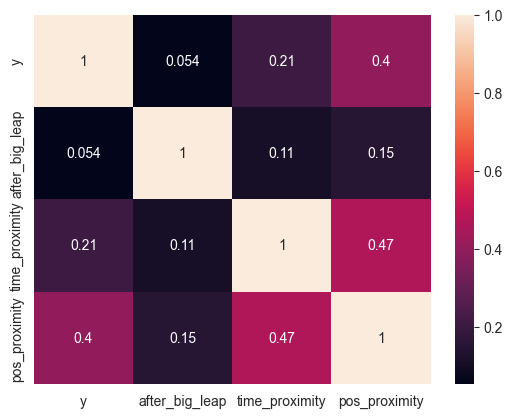

In [50]:
prox_feats = df_train[['y', 'after_big_leap', 'time_proximity', 'pos_proximity']]
cr = prox_feats.corr()
sns.heatmap(cr,annot=True)

In [215]:
import scipy.stats as sp
summaries = {
    'max': np.max,
    'min': np.min,
    'mean': np.mean,
    # 'q01': lambda x: np.quantile(x, q=0.01),
    'q05': lambda x: np.quantile(x, q=0.05),
    # 'q25': lambda x: np.quantile(x, q=0.25),
    'median': np.median,
    # 'q75': lambda x: np.quantile(x, q=0.75),
    'q95': lambda x: np.quantile(x, q=0.95),
    # 'q99': lambda x: np.quantile(x, q=0.99),
    # 'sd' : np.std,
    'var': np.var,
    'slope': lambda x: np.arctan(sp.linregress(np.arange(0,x.shape[0],1), x).slope),
    'diff' :  lambda x: x[-256:].mean() - x[:256].mean(),
    # 'kurtosis': sp.kurtosis,
    # 'trim_mean': lambda x: sp.trim_mean(x, 0.25),
}

from util import apply_summaries
X = apply_summaries(df_ts, summaries)
X

,max_E1A,max_E1H,max_E1P,max_E1V,max_E2A,max_E2H,max_E2P,max_E2V,max_E3A,max_E3H,...,diff_E4P,diff_E4V,diff_M1A,diff_M1H,diff_M1P,diff_M1V,diff_M2A,diff_M2H,diff_M2P,diff_M2V
0,3.106584,12.067687,19.177058,2.904495,2.064329,7.027072,6.340742,2.982987,3.890517,14.949150,...,0.232149,-0.035800,-0.002967,0.006149,-0.024737,-0.011681,0.001346,0.013800,0.002259,-0.012423
1,1.973324,3.334162,3.230021,2.075948,2.325271,3.196759,3.119100,2.203837,2.168119,4.257831,...,0.105077,-0.012591,-0.007376,0.006047,-0.035703,0.001688,-0.000399,-0.004712,-0.021839,-0.007352
2,4.905155,3.816043,4.624890,1.912259,3.906155,4.914904,6.291021,3.556789,2.485419,5.553386,...,0.024935,-0.011589,0.001767,0.007561,-0.008706,-0.003920,-0.000116,0.001856,0.018002,0.001417
3,4.146159,12.211521,20.694593,1.946000,2.528676,12.353929,17.187908,1.648643,3.365520,19.111603,...,0.565530,-0.008314,-0.003409,0.001011,-0.010124,-0.000683,0.001315,-0.004370,-0.015956,-0.003470
4,2.507720,6.752539,6.668999,3.012293,2.204402,7.998847,8.025621,2.356230,2.283782,10.433940,...,-0.059491,0.023441,-0.000324,-0.001685,0.010066,0.000199,0.002951,0.000633,-0.005445,-0.003266
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
658,2.627815,10.701584,12.654741,2.283455,2.531638,7.849816,6.931436,2.794771,2.605332,11.994953,...,-0.305541,-0.001968,-0.002239,0.005267,0.006127,-0.001606,0.000247,-0.000783,0.010322,0.003682
659,2.733922,4.979573,8.429594,3.103308,1.884466,7.571239,13.081043,1.217670,2.633123,6.707066,...,0.049787,-0.023415,-0.008297,-0.003120,0.000949,0.004070,-0.000992,0.000841,-0.013427,0.005366
660,4.631380,12.068901,14.897799,4.111245,2.937032,8.865655,13.798335,2.973656,10.616217,12.786204,...,-0.096720,-0.009967,0.003223,-0.001992,0.008634,-0.005317,-0.000466,-0.007098,-0.016357,-0.005142
661,2.340140,3.257143,9.396940,3.182236,4.438345,5.194028,5.873247,3.869224,3.320506,10.530150,...,-0.031597,0.012557,-0.002046,0.003342,-0.046218,-0.000121,-0.000143,0.004425,0.005107,-0.001381


In [130]:
X_new = pd.concat([X,prox_feats.iloc[:,1:]], axis=1)
X_new

,max_E1A,max_E1H,max_E1P,max_E1V,max_E2A,max_E2H,max_E2P,max_E2V,max_E3A,max_E3H,...,diff_M1H,diff_M1P,diff_M1V,diff_M2A,diff_M2H,diff_M2P,diff_M2V,after_big_leap,time_proximity,pos_proximity
0,3.106584,12.067687,19.177058,2.904495,2.064329,7.027072,6.340742,2.982987,3.890517,14.949150,...,0.006149,-0.024737,-0.011681,0.001346,0.013800,0.002259,-0.012423,False,4.0,0.0
1,1.973324,3.334162,3.230021,2.075948,2.325271,3.196759,3.119100,2.203837,2.168119,4.257831,...,0.006047,-0.035703,0.001688,-0.000399,-0.004712,-0.021839,-0.007352,False,7.0,7.0
2,4.905155,3.816043,4.624890,1.912259,3.906155,4.914904,6.291021,3.556789,2.485419,5.553386,...,0.007561,-0.008706,-0.003920,-0.000116,0.001856,0.018002,0.001417,False,1.0,1.0
3,4.146159,12.211521,20.694593,1.946000,2.528676,12.353929,17.187908,1.648643,3.365520,19.111603,...,0.001011,-0.010124,-0.000683,0.001315,-0.004370,-0.015956,-0.003470,False,5.0,1.0
4,2.507720,6.752539,6.668999,3.012293,2.204402,7.998847,8.025621,2.356230,2.283782,10.433940,...,-0.001685,0.010066,0.000199,0.002951,0.000633,-0.005445,-0.003266,False,3.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
658,2.627815,10.701584,12.654741,2.283455,2.531638,7.849816,6.931436,2.794771,2.605332,11.994953,...,0.005267,0.006127,-0.001606,0.000247,-0.000783,0.010322,0.003682,False,7.0,2.0
659,2.733922,4.979573,8.429594,3.103308,1.884466,7.571239,13.081043,1.217670,2.633123,6.707066,...,-0.003120,0.000949,0.004070,-0.000992,0.000841,-0.013427,0.005366,False,1.0,1.0
660,4.631380,12.068901,14.897799,4.111245,2.937032,8.865655,13.798335,2.973656,10.616217,12.786204,...,-0.001992,0.008634,-0.005317,-0.000466,-0.007098,-0.016357,-0.005142,False,8.0,0.0
661,2.340140,3.257143,9.396940,3.182236,4.438345,5.194028,5.873247,3.869224,3.320506,10.530150,...,0.003342,-0.046218,-0.000121,-0.000143,0.004425,0.005107,-0.001381,False,2.0,0.0


In [214]:
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import make_pipeline
x_train, x_test, y_train, y_test = train_test_split(X_new, df_train.y, test_size=0.3, stratify=df_train.y_s)
model = SVC(class_weight='balanced')
model.fit(x_train,y_train)

TypeError: Cannot cast DatetimeArray to dtype float64

      max_E1A    max_E1H    max_E1P    max_E1V   max_E2A    max_E2H  \
490  1.746230   7.179018  10.680555   1.972606  2.411896   3.886138   
130  1.754491   3.929554   3.859512   1.623746  2.407567   2.542637   
284  1.861606   9.843891  11.969041   2.541783  2.688904   6.132646   
439  5.076370   5.445511   6.145637   3.016829  5.847045   4.063834   
432  0.779796   2.176321   2.667470   0.652264  1.836764   1.356109   
..        ...        ...        ...        ...       ...        ...   
237  0.712723   2.413601   3.495464   0.986564  0.620107   1.622086   
355  2.937503   3.594010   3.269839   3.074446  3.484389   3.470628   
368  5.037385  19.265093  22.829662   3.588505  3.390093  14.457881   
207  2.913634   3.370876   4.243063   1.935490  4.623407   5.606095   
382  8.154739  42.718948  52.615211  10.027019  4.356575  20.349724   

       max_E2P   max_E2V    max_E3A    max_E3H  ...  diff_M1H  diff_M1P  \
490   3.595903  2.961781   2.917477   6.804743  ... -0.006463 -0.006811 

(array([[162,  23,   1],
        [  9,   2,   0],
        [  0,   2,   0]], dtype=int64),
 0.35092864125122186)

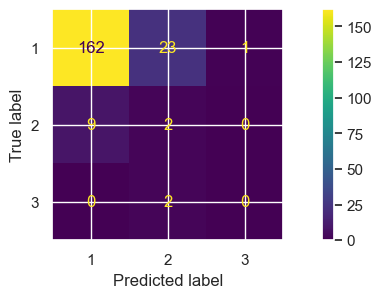

In [173]:
from sklearn.metrics import confusion_matrix, balanced_accuracy_score, ConfusionMatrixDisplay

y_hat = model.predict(x_test)
ConfusionMatrixDisplay.from_predictions(y_test, y_hat)

confusion_matrix(y_test,y_hat),balanced_accuracy_score(y_test, y_hat)

Now, this results are good without even doing a gridsearch, nice!

**BUT** we're playing a risky game bc actually our features incorporate some of the data about the target, mixed into proximity_pos and proximity_time!
This might mean a very big overfit, and to check this we should do a gridsearch with these features computed only from the actual data 

In [216]:
from sklearn.base import BaseEstimator, TransformerMixin

class ProximityFeatures(BaseEstimator, TransformerMixin):
    def __init__(self, window=7, future_prox=True) -> None:
        super().__init__()
        self.window = window
        self.future_prox = future_prox

    def fit(self, X:pd.DataFrame,y):
        X = X.copy()
        X['y_c'] = y-1
        broken_when = X.groupby(['when_dt']).y_c.sum()

        self.time_map = broken_when\
            .sort_index()\
            .rolling(window=self.window, center=self.future_prox, min_periods=1)\
            .sum()

        self.pos_map = X\
            .sort_values('when_dt')\
            .groupby(['main.pos', 'when_dt'])\
            .y_c.sum().reset_index()\
            .groupby('main.pos')\
            .apply(lambda x: x.set_index('when_dt').y_c.rolling(window=self.window, center=self.future_prox, min_periods=1).sum())
        
        return self
    
    def transform(self, X:pd.DataFrame,y=None):
        assert all(col in X.columns for col in ['main.pos', 'fun.pos', 'when_dt']) ,'Required columns are missing'
        X['after_big_leap'] = X.when_dt.between(big_leap, big_leap_proximity_end)
        X['time_proximity'] = X.when_dt.map(self.time_map)
        X['pos_proximity'] = X.apply(lambda row: self.pos_map[(row['main.pos'], row['when_dt'])] if (row['main.pos'], row['when_dt']) in self.pos_map.index else pd.NA, axis=1)
        X = X.drop(columns=['main.pos','fun.pos','when_dt'])
        X.fillna(0, inplace=True)
        return X
    

ProximityFeatures(window=5, future_prox=False).fit_transform(X=df_train.loc[:,['when_dt', 'main.pos', 'fun.pos', 'E1A1']], y=df_train.y)

,E1A1,after_big_leap,time_proximity,pos_proximity
0,-0.576589,False,3.0,0.0
1,0.970694,False,7.0,6.0
2,1.065262,False,0.0,0.0
3,-0.341942,False,3.0,1.0
4,-0.569563,False,2.0,0.0
...,...,...,...,...
658,-0.094653,False,6.0,1.0
659,-0.447106,False,1.0,1.0
660,0.264532,False,6.0,0.0
661,-0.522473,False,0.0,0.0


## Gridsearch

In [222]:
X_new = pd.concat([X,df_train.loc[:,['when_dt','main.pos', 'fun.pos']]], axis=1)

In [223]:
params = {
    'proximityfeatures__window': [1,3,5,7,9,11,13,15],
    'proximityfeatures__future_prox': [True,False],
    'svc__C' : np.linspace(0.1,3,40),
    'svc__kernel':['poly','rbf','linear']}

In [224]:
pipe = make_pipeline(
    ProximityFeatures(),
    SVC(class_weight='balanced',random_state=1789)
)
from sklearn.model_selection import GridSearchCV, StratifiedKFold
skf = StratifiedKFold(n_splits=4)
cv = GridSearchCV(
    pipe, 
    param_grid=params, 
    scoring='balanced_accuracy', 
    n_jobs=-1, 
    cv=skf.split(X_new, df_train.y)
)
cv.fit(X_new,df_train.y)

cv.best_params_, cv.best_score_

is it at least learning the train?

      max_E1A    max_E1H    max_E1P   max_E1V   max_E2A    max_E2H    max_E2P  \
0    3.106584  12.067687  19.177058  2.904495  2.064329   7.027072   6.340742   
1    1.973324   3.334162   3.230021  2.075948  2.325271   3.196759   3.119100   
2    4.905155   3.816043   4.624890  1.912259  3.906155   4.914904   6.291021   
3    4.146159  12.211521  20.694593  1.946000  2.528676  12.353929  17.187908   
4    2.507720   6.752539   6.668999  3.012293  2.204402   7.998847   8.025621   
..        ...        ...        ...       ...       ...        ...        ...   
658  2.627815  10.701584  12.654741  2.283455  2.531638   7.849816   6.931436   
659  2.733922   4.979573   8.429594  3.103308  1.884466   7.571239  13.081043   
660  4.631380  12.068901  14.897799  4.111245  2.937032   8.865655  13.798335   
661  2.340140   3.257143   9.396940  3.182236  4.438345   5.194028   5.873247   
662  3.956557   9.831104   9.907219  4.142324  2.642562   5.624139   4.585637   

      max_E2V    max_E3A   

(array([[528,  92,   0],
        [  7,  32,   0],
        [  0,   1,   3]], dtype=int64),
 0.8073752412462089)

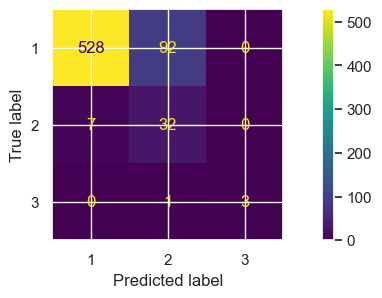

In [ ]:
y_hat = cv.predict(X_new)
ConfusionMatrixDisplay.from_predictions(df_train.y, y_hat)

confusion_matrix(df_train.y,y_hat),balanced_accuracy_score(df_train.y, y_hat)

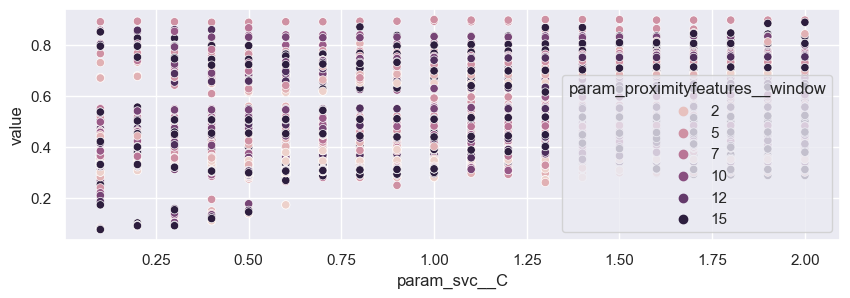

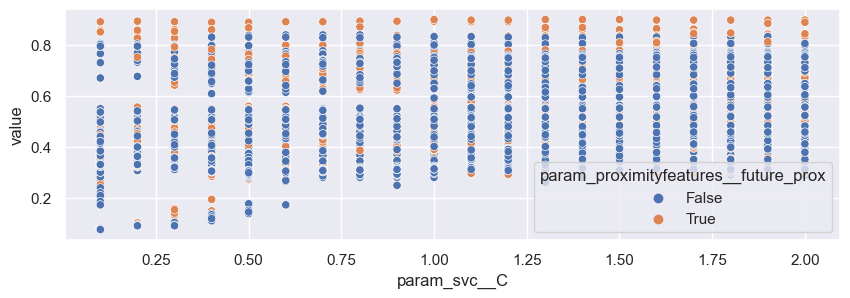

In [ ]:
from util import plot_cv_results

plot_cv_results(cv, 'param_svc__C', 'param_proximityfeatures__window')
plt.show()
plot_cv_results(cv, 'param_svc__C', 'param_proximityfeatures__future_prox')

# Submission

In [ ]:
# X = apply_summaries(df_ts, summaries)
# prox_feats = ProximityFeatures(**cv.best_params_['functiontransformer__kw_args']).transform(df_train.loc[:,['when_dt', 'y','main.pos','fun.pos']])
# X_final = pd.concat([X,prox_feats], axis=1)

model_final = cv

In [ ]:
df_sub = pd.read_csv('data\\test.csv')
X_sub = apply_summaries(df_sub.iloc[:,4:], funcs=summaries)
df_sub['when_dt'] = pd.to_datetime(df_sub.when)
X_sub_final = pd.concat([X_sub,df_sub.loc[:,['main.pos', 'fun.pos','when_dt']]], axis=1)

y_sub = model_final.predict(X_sub_final)

      max_E1A    max_E1H    max_E1P   max_E1V   max_E2A    max_E2H    max_E2P  \
0    1.025079   3.437285   4.649390  0.847752  0.954272   2.616750   3.081579   
1    2.033479   2.893542   3.780956  1.536200  1.477238   2.650631   5.950809   
2    0.762409   1.063346   0.557666  0.869384  0.757156   1.117376   1.050070   
3    5.107154   5.533117   5.894457  5.630909  9.734289   6.858533   4.405096   
4    4.105486  10.949091  11.410048  2.595387  3.920266   5.462204   7.803990   
..        ...        ...        ...       ...       ...        ...        ...   
350  2.782943   8.108706   7.711031  2.397421  2.487763   4.047574   3.659072   
351  5.793393   6.020329   8.272335  4.608157  7.158296   4.696309   7.920224   
352  0.708826   2.060709   2.339750  0.856979  0.690347   3.433908   3.791892   
353  3.699478   5.459538   8.029457  5.186930  4.511935   3.774038   9.154111   
354  4.671399  15.534972  20.009827  2.977513  2.727540  19.376198  21.561596   

      max_E2V   max_E3A    

      max_E1A    max_E1H    max_E1P   max_E1V   max_E2A    max_E2H    max_E2P  \
0    1.025079   3.437285   4.649390  0.847752  0.954272   2.616750   3.081579   
1    2.033479   2.893542   3.780956  1.536200  1.477238   2.650631   5.950809   
2    0.762409   1.063346   0.557666  0.869384  0.757156   1.117376   1.050070   
3    5.107154   5.533117   5.894457  5.630909  9.734289   6.858533   4.405096   
4    4.105486  10.949091  11.410048  2.595387  3.920266   5.462204   7.803990   
..        ...        ...        ...       ...       ...        ...        ...   
350  2.782943   8.108706   7.711031  2.397421  2.487763   4.047574   3.659072   
351  5.793393   6.020329   8.272335  4.608157  7.158296   4.696309   7.920224   
352  0.708826   2.060709   2.339750  0.856979  0.690347   3.433908   3.791892   
353  3.699478   5.459538   8.029457  5.186930  4.511935   3.774038   9.154111   
354  4.671399  15.534972  20.009827  2.977513  2.727540  19.376198  21.561596   

      max_E2V   max_E3A    

[Text(0, 0, '285'),
 Text(0, 0, '0'),
 Text(0, 0, '0'),
 Text(0, 0, '0'),
 Text(0, 0, '0'),
 Text(0, 0, '68'),
 Text(0, 0, '0'),
 Text(0, 0, '0'),
 Text(0, 0, '0'),
 Text(0, 0, '2')]

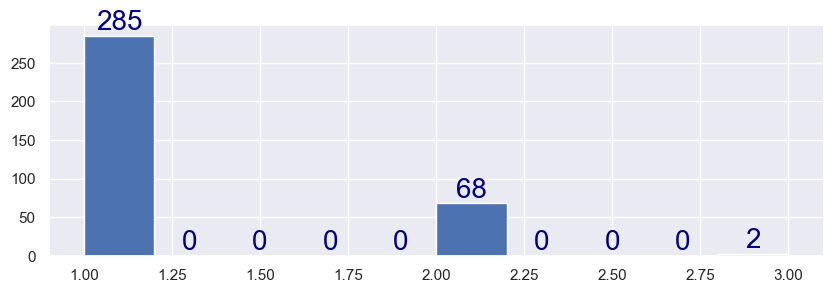

In [ ]:
y_sub = model_final.predict(X_sub_final)
values, bins, bars = plt.hist(y_sub)
plt.bar_label(bars, fontsize=20, color='navy')

In [ ]:
from datetime import datetime

submission_df = pd.DataFrame(y_sub,columns=['y'])
submission_df['id'] = df_sub.id
submission_df.set_index('id', inplace=True)
# submission_df.y = submission_df.y
submission_df.to_csv(f'data\\submissions\\vicinity_{datetime.now().strftime("%H.%M_%d")}.csv')